# Lecture 03 - Demo Notebook

We recommend using Noto for this lecture tutorial, where we've already installed the dependencies of the pymer4 package and statsmodels.

We extended the data with extra features. The feature description is found [here](https://docs.google.com/spreadsheets/d/15UvkrJgTapWispb6tSjMTZh0yJooOsxQ3sWIhKjYM7I/edit?usp=sharing). 

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import root_mean_squared_error

# Import Gaussian modeling
import statsmodels.formula.api as smf

# Data directory
DATA_DIR = "./../../data"

In [2]:
# Parse the data
df = pd.read_csv('{}/aggregated_extended_fc.csv'.format(DATA_DIR))
df = df.fillna('NaN')
list(df.columns)
display(df)

,user,ch_num_sessions,ch_time_in_prob_sum,ch_time_in_video_sum,ch_ratio_clicks_weekend_day,ch_total_clicks_weekend,ch_total_clicks_weekday,ch_time_sessions_mean,ch_time_sessions_std,bo_delay_lecture,...,la_weekly_prop_watched_mean,la_weekly_prop_interrupted_mean,la_weekly_prop_interrupted_std,la_weekly_prop_replayed_mean,la_weekly_prop_replayed_std,la_frequency_action_video_play,grade,gender,category,year
0,0,1.9,2334.4,2951.8,0.850000,16.8,38.1,1392.858333,790.762032,55068.387500,...,0.245714,0.024286,0.0,0.010000,0.0,0.179203,4.50,NaN,NaN,Y2-2018-19
1,1,3.4,1698.4,9227.8,0.567500,4.0,179.4,3068.720238,1257.504407,-2883.367738,...,0.748868,0.074683,0.0,0.066456,0.0,0.332424,4.50,M,Suisse.Autres,Y2-2018-19
2,2,5.3,2340.6,10801.3,26.562274,94.6,129.2,1750.289268,1024.134043,10027.216667,...,0.354487,0.026667,0.0,0.059915,0.0,0.284407,5.25,M,Suisse.PAM,Y2-2018-19
3,3,2.8,2737.1,8185.5,3.691250,13.5,46.4,20203.590260,656.052901,27596.864484,...,0.370000,0.014286,0.0,0.020000,0.0,0.108774,4.50,F,Suisse.Autres,Y2-2018-19
4,4,2.5,3787.3,7040.0,1.543889,58.4,64.9,3373.908333,1363.320365,-914.633333,...,0.030000,0.000000,0.0,0.020000,0.0,0.199775,4.75,F,France,Y2-2018-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,293,3.5,8127.5,113.4,0.632304,28.9,20.6,7963.627500,1001.514794,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.034080,5.25,M,France,Y3-2019-20
284,294,2.2,2452.4,4623.1,18.147762,36.4,71.3,3614.055952,853.195566,16834.900000,...,0.140530,0.011111,0.0,0.000000,0.0,0.186649,5.25,F,France,Y3-2019-20
285,296,0.9,1643.2,1932.4,0.000000,0.4,31.2,926.916667,616.918475,-12860.522222,...,0.069231,0.023077,0.0,0.000000,0.0,0.028596,6.00,F,France,Y3-2019-20
286,297,1.4,2718.6,360.3,0.180000,2.0,15.3,346.437500,122.017326,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.032353,5.00,M,Suisse.PAM,Y3-2019-20


### Linear Regression

We will fit a simple linear regression with the pymer4 library with one variable.

In [4]:
# Initialize and fit linear regression model using 1 predictor (time_in_prob) and sample data
model = smf.ols("grade ~ mu_speed_playback_mean", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5.649
Date:                Mon, 23 Feb 2026   Prob (F-statistic):             0.0181
Time:                        00:05:05   Log-Likelihood:                -463.54
No. Observations:                 288   AIC:                             931.1
Df Residuals:                     286   BIC:                             938.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

Let's **visualize the fit** of our linear regression model.

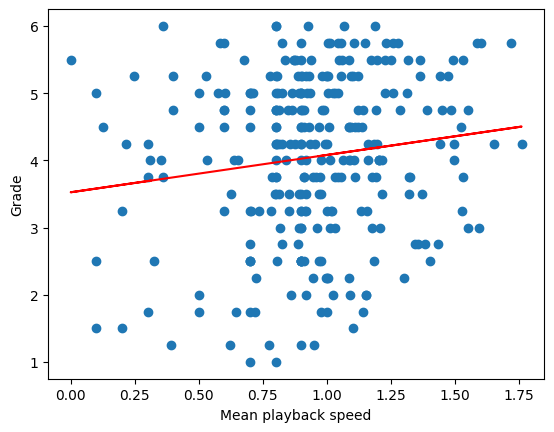

In [12]:
# fit a regression line
x_pred = df.mu_speed_playback_mean
y_pred = result.fittedvalues

plt.figure()
plt.scatter(df.mu_speed_playback_mean, df.grade)
plt.plot(x_pred,y_pred, color='red')
plt.xlabel("Mean playback speed")
plt.ylabel("Grade")
plt.show()

### Two-Variable Regression

Next, we will do a regression with **two variables**. Which of these variables has the larger influence on grade?

In [13]:
# Linear regression with two variables

# Initialize and fit model using 2 predictor (time_in_problem) and sample data
regression_two_variables = smf.ols("grade ~ ch_time_in_prob_sum + wa_num_subs_perc_correct", data=df)
regression_two_variables_result = regression_two_variables.fit()
print(regression_two_variables_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     17.68
Date:                Mon, 23 Feb 2026   Prob (F-statistic):           5.80e-08
Time:                        00:07:40   Log-Likelihood:                -449.52
No. Observations:                 288   AIC:                             905.0
Df Residuals:                     285   BIC:                             916.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

The two variables have very different scales: one is time in seconds {0, inf} and one is percentage {0, 1}. Therefore, we cannot directly compare them.

To make the coefficients comparable, we will standardize them by computing the **z-score**.

In [14]:
# compute z-score for time in problem and percentage correct
df['time_in_prob_z'] = (df.ch_time_in_prob_sum - df.ch_time_in_prob_sum.mean())/df.ch_time_in_prob_sum.std()
df['percentage_correct_z'] = (df.wa_num_subs_perc_correct - df.wa_num_subs_perc_correct.mean())/df.wa_num_subs_perc_correct.std()

# re-compute the regression
# Initialize and fit model using 2 predictor (time_in_problem) and sample data
regression_comparable = smf.ols("grade ~ time_in_prob_z + percentage_correct_z", data=df)

regression_comparable_result = regression_comparable.fit()
print(regression_comparable_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     17.68
Date:                Mon, 23 Feb 2026   Prob (F-statistic):           5.80e-08
Time:                        00:08:12   Log-Likelihood:                -449.52
No. Observations:                 288   AIC:                             905.0
Df Residuals:                     285   BIC:                             916.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.0486 

We observe that the **time in problem** attribute has a larger impact on grade than **percentage correct**.

Another option is to use a MinMax Scaling, i.e. we are not standardizing the features but normalizing them between 0 and 1. We don't need to apply the scaler to the percentage of correct solution as this features is naturally between 0 and 1.

In [15]:
scaler = MinMaxScaler()
scaler.fit((df['ch_time_in_prob_sum']).to_numpy().reshape(-1,1))
df['time_in_problem_norm'] = scaler.transform((df['ch_time_in_prob_sum']).to_numpy().reshape(-1,1))
df.head()

,user,ch_num_sessions,ch_time_in_prob_sum,ch_time_in_video_sum,ch_ratio_clicks_weekend_day,ch_total_clicks_weekend,ch_total_clicks_weekday,ch_time_sessions_mean,ch_time_sessions_std,bo_delay_lecture,...,la_weekly_prop_replayed_mean,la_weekly_prop_replayed_std,la_frequency_action_video_play,grade,gender,category,year,time_in_prob_z,percentage_correct_z,time_in_problem_norm
0,0,1.9,2334.4,2951.8,0.850000,16.8,38.1,1392.858333,790.762032,55068.387500,...,0.010000,0.0,0.179203,4.50,NaN,NaN,Y2-2018-19,-0.212453,-0.354933,0.209856
1,1,3.4,1698.4,9227.8,0.567500,4.0,179.4,3068.720238,1257.504407,-2883.367738,...,0.066456,0.0,0.332424,4.50,M,Suisse.Autres,Y2-2018-19,-0.501291,1.835571,0.152682
2,2,5.3,2340.6,10801.3,26.562274,94.6,129.2,1750.289268,1024.134043,10027.216667,...,0.059915,0.0,0.284407,5.25,M,Suisse.PAM,Y2-2018-19,-0.209637,0.438664,0.210414
3,3,2.8,2737.1,8185.5,3.691250,13.5,46.4,20203.590260,656.052901,27596.864484,...,0.020000,0.0,0.108774,4.50,F,Suisse.Autres,Y2-2018-19,-0.029567,0.077082,0.246058
4,4,2.5,3787.3,7040.0,1.543889,58.4,64.9,3373.908333,1363.320365,-914.633333,...,0.020000,0.0,0.199775,4.75,F,France,Y2-2018-19,0.447380,-1.190914,0.340468


In [16]:
# re-compute the regression
# Initialize and fit model using 2 predictor (time_in_problem) and sample data
regression_scaled = smf.ols("grade ~ time_in_problem_norm + wa_num_subs_perc_correct", data=df)

regression_scaled_result = regression_scaled.fit()
print(regression_scaled_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     17.68
Date:                Mon, 23 Feb 2026   Prob (F-statistic):           5.80e-08
Time:                        00:08:39   Log-Likelihood:                -449.52
No. Observations:                 288   AIC:                             905.0
Df Residuals:                     285   BIC:                             916.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Generalized Linear Models

Now that we have successfully experimented with regression, we are interested in predicting whether a student will pass/fail a course.

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# compute pass/fail label
df['passed'] = df.grade >= 4
df['passed'] = df['passed'].astype(int)

# logistic regression
mod1 = smf.glm(formula='passed ~ wa_num_subs_perc_correct', data=df, family=sm.families.Binomial()).fit()
print(mod1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 passed   No. Observations:                  288
Model:                            GLM   Df Residuals:                      286
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -193.28
Date:                Mon, 23 Feb 2026   Deviance:                       386.57
Time:                        00:08:45   Pearson chi2:                     288.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.003213
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Mixed Effect Models

Sometimes, we might deal with correlated samples. For example, our data set contains students from different origin. We might hypothesize that students having a similar background (category) behave more similar as they come from the same school/education system.  

We will therefore now run a model with a **random intercept**, i.e. we will assume that the intercept depends on the category the students are in.

In [22]:
# Initialize model instance using 1 predictor with random intercepts and slopes
model = smf.mixedlm("passed ~ wa_num_subs_perc_correct", data=df, groups=df["category"])

# Fit it
result = model.fit()
print(result.summary())

              Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    passed   
No. Observations:     288        Method:                REML     
No. Groups:           5          Scale:                 0.2350   
Min. group size:      11         Log-Likelihood:        -204.5112
Max. group size:      114        Converged:             Yes      
Mean group size:      57.6                                       
-----------------------------------------------------------------
                         Coef. Std.Err.   z   P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept                0.544    0.062 8.783 0.000  0.423  0.666
wa_num_subs_perc_correct 0.157    0.141 1.113 0.266 -0.119  0.434
Group Var                0.006    0.015                          



/opt/jlab-env/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)



### Regression for Time-Series Data

Next, we analyze the data over time as we are dealing with **time series** interactions. First, we create a dataframe containing information about the user.

In [23]:
# parse the necessary data frames
df_ui = (df.loc[:,['user','grade','gender','category','year']]).copy()

# compute pass/fail label
df_ui['passed'] = (df_ui['grade'] >= 4).astype(int)
display(df_ui)

,user,grade,gender,category,year,passed
0,0,4.50,NaN,NaN,Y2-2018-19,1
1,1,4.50,M,Suisse.Autres,Y2-2018-19,1
2,2,5.25,M,Suisse.PAM,Y2-2018-19,1
3,3,4.50,F,Suisse.Autres,Y2-2018-19,1
4,4,4.75,F,France,Y2-2018-19,1
...,...,...,...,...,...,...
283,293,5.25,M,France,Y3-2019-20,1
284,294,5.25,F,France,Y3-2019-20,1
285,296,6.00,F,France,Y3-2019-20,1
286,297,5.00,M,Suisse.PAM,Y3-2019-20,1


Next, we parse the the data.

In [24]:
df_byweek = pd.read_csv('{}/fc_long_extended.csv'.format(DATA_DIR))
display(df_byweek)

,Unnamed: 0,week,user,ch_num_sessions,ch_time_in_prob_sum,ch_time_in_video_sum,ch_ratio_clicks_weekend_day,ch_total_clicks_weekend,ch_total_clicks_weekday,ch_time_sessions_mean,...,la_seek_len_std,la_pause_dur_std,la_time_speeding_up_mean,la_time_speeding_up_std,la_weekly_prop_watched_mean,la_weekly_prop_interrupted_mean,la_weekly_prop_interrupted_std,la_weekly_prop_replayed_mean,la_weekly_prop_replayed_std,la_frequency_action_video_play
0,10,0,1,7.0,326.0,15525.0,5.675000,40.0,227.0,1931.285714,...,146.564097,188.175709,65.173554,150.807752,0.600000,0.100000,0.0,0.000000,0.0,0.400749
1,11,1,1,4.0,350.0,8411.0,0.000000,0.0,207.0,2190.250000,...,8.486253,78.639644,47.872928,67.365584,0.800000,0.000000,0.0,0.100000,0.0,0.391304
2,12,2,1,5.0,4577.0,8691.0,0.000000,0.0,167.0,2106.200000,...,63.484419,105.108022,64.533835,81.772612,1.000000,0.000000,0.0,0.000000,0.0,0.359281
3,13,3,1,4.0,259.0,12055.0,0.000000,0.0,239.0,3078.500000,...,31.535282,75.997314,58.085308,86.465139,0.769231,0.000000,0.0,0.153846,0.0,0.359833
4,14,4,1,3.0,480.0,13235.0,0.000000,0.0,197.0,4116.666667,...,10.594150,202.504038,78.057143,140.802708,1.000000,0.285714,0.0,0.285714,0.0,0.390863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,2835,5,293,2.0,9315.0,0.0,0.513514,37.0,19.0,4657.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
2336,2836,6,293,3.0,86.0,549.0,4.333333,3.0,13.0,211.666667,...,0.000000,116.639044,13.000000,9.000000,0.000000,0.000000,0.0,0.000000,0.0,0.312500
2337,2837,7,293,3.0,3675.0,0.0,0.000000,0.0,41.0,1225.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
2338,2838,8,293,5.0,10956.0,0.0,0.000000,0.0,53.0,601.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


In [25]:
df_byuser = df_byweek.sort_values(by=['user', 'week']).reset_index(drop=True)

We can now run a model over the time series data of the students. In our first task, we are interested in predicting course grade early on during the semester. This type of information can be useful for an instructor in order to be able to provide intervention to struggling students. We will use again the category as a random effect.
We will need to train a separate model for each week (i.e. predicting after 1 week of the course, after 2 weeks of the course, after 3 weeks, etc.). However, we will use the same equation for all models.

**Step 1**: We will write a function that aggregates the features for all weeks.

In [26]:
def aggregate_features(df_ui, df_byuser, week_nr):

    df_weeknr = df_byuser[df_byuser['week'] < week_nr]
    df_return = df_weeknr.groupby(['user']).mean()
    df_return['user'] = df_return.index
    
    # Return df with aggregated features
    df_return = df_return.set_index('user').join(df_ui.set_index('user'))
    df_return.reset_index()
    
    return df_return

**Step 2**: We will split the data into a training and test set (20% users in the test set, stratified by pass/fail label). In our case, **data stratification** refers to choosing a sample with the same ratio of pass/fail as the initial dataset, so our training set and our test set are both representative of our original population. If you are interested, you can read more about [stratifying test sets here](https://www.baeldung.com/cs/ml-stratified-sampling).

In [27]:
# perform train/test split
df_week5 = aggregate_features(df_ui, df_byuser, 5)
df_train5, df_test5 = train_test_split(df_week5, test_size=0.2, random_state=0,  stratify=df_week5['passed'])

df_week10 = aggregate_features(df_ui, df_byuser, 10)
df_train10, df_test10 = train_test_split(df_week10, test_size=0.2, random_state=0,  stratify=df_week10['passed'])

**Step 3**: We will now train our model on the training data for 5 and 10 weeks.

In [28]:
# Week 5 model
# Random intercept for 'category', fixed effect for 'wa_num_subs_perc_correct'
model5 = smf.mixedlm("grade ~ wa_num_subs_perc_correct", data=df_train5, groups=df_train5["category"])
result5 = model5.fit(method='nm', maxiter=500, reml=False)
print(result5.summary())

# Week 10 model
model10 = smf.mixedlm("grade ~ wa_num_subs_perc_correct", data=df_train10, groups=df_train10["category"])
result10 = model5.fit(method='nm', maxiter=500, reml=False)
print(result10.summary())

              Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    grade    
No. Observations:      187        Method:                ML       
No. Groups:            5          Scale:                 1.3404   
Min. group size:       4          Log-Likelihood:        -294.7658
Max. group size:       72         Converged:             Yes      
Mean group size:       37.4                                       
------------------------------------------------------------------
                         Coef. Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                3.818    0.196 19.430 0.000  3.433  4.203
wa_num_subs_perc_correct 0.547    0.363  1.508 0.132 -0.164  1.259
Group Var                0.050    0.047                           

              Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    grade    
No. Observations:      1

**Step 4**: We predict on the test data and check the Accuracy

In [31]:
# predict on the test data for weeks 5, 10
predictions5 = result5.predict(df_test5)
rmse5 = root_mean_squared_error(df_test5['passed'], predictions5)

predictions10 = result5.predict(df_test10)
rmse10 = root_mean_squared_error(df_test10['passed'], predictions10)

print(rmse5)
print(rmse10)

3.444852503985909
3.41622629062942
